# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---


In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import gmaps

# Import API key
from api_keys import api_key
from api_keys import gkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "./output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [15]:
#test_cities = cities[0:20]
#test_cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
# Define initial url and preferred units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

# Get data for each city in cities.csv
cities_pd = pd.DataFrame()

cities_pd["City"] = ""
cities_pd["Country"] = ""
cities_pd["Date"] = ""
cities_pd["Lat"] = ""
cities_pd["Lng"] = ""
cities_pd["Cloudiness"] = ""
cities_pd["Humidity"] = ""
cities_pd["Max Temp"] = ""
cities_pd["Wind Speed"] = ""

#cities_pd.rename(columns= {'0':'City'})
#cities_pd.head()

# response = requests.get(query_url + cities[0]).json()
# print(response)
# print(query_url + cities[0])

In [5]:
record = 0

print(f"Beginning Data Retrieval")
print("--------------------------")

# Loop through cities and print progress and any skips
# This will also keep track of the number of cities pulled
for index, city in enumerate(cities):
    
    response = requests.get(query_url + city).json()
    #print(response)
    #print(query_url + city)
    #print(json.dumps(response, indent=4, sort_keys=True))
              
    try:
        cities_pd.loc[index, 'City'] = response['name']
        cities_pd.loc[index, 'Country'] = response['sys']['country']
        cities_pd.loc[index, 'Date'] = response['dt']
        cities_pd.loc[index, 'Lat'] = response['coord']['lat']
        cities_pd.loc[index, 'Lng'] = response['coord']['lon']
        cities_pd.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_pd.loc[index, 'Humidity'] = response['main']['humidity']
        cities_pd.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_pd.loc[index, 'Wind Speed'] = response['wind']['speed']

       
        set = (record // 50)  
        count = (record - (set * 50)) + 1
        record += 1
        
        print(f"Processing Record {count} of Set {set + 1} | {city}")
        print(query_url + city)
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        
print("--------------------------")
print("Data Retrieval Complete")
print("--------------------------")
        

Beginning Data Retrieval
--------------------------
Processing Record 1 of Set 1 | fez
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=fez
Processing Record 2 of Set 1 | hami
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=hami
Processing Record 3 of Set 1 | albany
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=albany
Processing Record 4 of Set 1 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=bambous virieux
Processing Record 5 of Set 1 | makinsk
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=makinsk
Processing Record 6 of Set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=rikitea
Processing Record 7 of Set 1 | tasiilaq
http://a

Processing Record 4 of Set 2 | khatanga
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=khatanga
Processing Record 5 of Set 2 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=hithadhoo
Processing Record 6 of Set 2 | vardo
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=vardo
Processing Record 7 of Set 2 | truckee
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=truckee
City not found. Skipping...
Processing Record 8 of Set 2 | rapid city
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=rapid city
Processing Record 9 of Set 2 | luderitz
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=luderitz
Processing Record 10 of Set 2 | cardoso
http://api.openweather

Processing Record 7 of Set 3 | kendari
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=kendari
Processing Record 8 of Set 3 | copalillo
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=copalillo
Processing Record 9 of Set 3 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=vila franca do campo
Processing Record 10 of Set 3 | flinders
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=flinders
Processing Record 11 of Set 3 | canton
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=canton
Processing Record 12 of Set 3 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=butaritari
Processing Record 13 of Set 3 | broome
http://api.openweather

Processing Record 10 of Set 4 | rawson
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=rawson
Processing Record 11 of Set 4 | mount isa
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=mount isa
Processing Record 12 of Set 4 | kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=kaitangata
Processing Record 13 of Set 4 | buckeye
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=buckeye
Processing Record 14 of Set 4 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=saskylakh
Processing Record 15 of Set 4 | moose factory
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=moose factory
Processing Record 16 of Set 4 | arraial do cabo
http://api.openweather

Processing Record 13 of Set 5 | kiama
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=kiama
Processing Record 14 of Set 5 | jamestown
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=jamestown
City not found. Skipping...
Processing Record 15 of Set 5 | yaan
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=yaan
Processing Record 16 of Set 5 | mitsamiouli
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=mitsamiouli
Processing Record 17 of Set 5 | upernavik
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=upernavik
Processing Record 18 of Set 5 | aksu
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=aksu
Processing Record 19 of Set 5 | qaanaaq
http://api.openweathermap.

Processing Record 17 of Set 6 | san andres
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=san andres
Processing Record 18 of Set 6 | hambantota
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=hambantota
Processing Record 19 of Set 6 | lompoc
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=lompoc
Processing Record 20 of Set 6 | kalispell
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=kalispell
City not found. Skipping...
Processing Record 21 of Set 6 | teknaf
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=teknaf
Processing Record 22 of Set 6 | bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=bathsheba
Processing Record 23 of Set 6 | waipawa
http://api

Processing Record 20 of Set 7 | necochea
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=necochea
Processing Record 21 of Set 7 | mafeteng
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=mafeteng
Processing Record 22 of Set 7 | kapit
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=kapit
Processing Record 23 of Set 7 | piranhas
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=piranhas
Processing Record 24 of Set 7 | mbumi
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=mbumi
Processing Record 25 of Set 7 | boguchany
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=boguchany
Processing Record 26 of Set 7 | juneau
http://api.openweathermap.org/data/2.5/weather?appid=

Processing Record 22 of Set 8 | saint-louis
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=saint-louis
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 23 of Set 8 | bogo
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=bogo
Processing Record 24 of Set 8 | ranau
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=ranau
Processing Record 25 of Set 8 | maldonado
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=maldonado
Processing Record 26 of Set 8 | eenhana
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=eenhana
Processing Record 27 of Set 8 | chibombo
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=chibombo
Proces

Processing Record 24 of Set 9 | coos bay
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=coos bay
Processing Record 25 of Set 9 | boyuibe
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=boyuibe
Processing Record 26 of Set 9 | senno
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=senno
Processing Record 27 of Set 9 | matara
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=matara
Processing Record 28 of Set 9 | lukaya
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=lukaya
City not found. Skipping...
Processing Record 29 of Set 9 | jacareacanga
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=jacareacanga
Processing Record 30 of Set 9 | san juan
http://api.openweathe

Processing Record 27 of Set 10 | saint-paul
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=saint-paul
Processing Record 28 of Set 10 | liverpool
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=liverpool
Processing Record 29 of Set 10 | iberia
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=iberia
City not found. Skipping...
Processing Record 30 of Set 10 | kapuskasing
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=kapuskasing
Processing Record 31 of Set 10 | nauta
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=nauta
Processing Record 32 of Set 10 | tanabe
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=tanabe
Processing Record 33 of Set 10 | nizhniy kuranakh


Processing Record 29 of Set 11 | sindor
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=sindor
Processing Record 30 of Set 11 | kloulklubed
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=kloulklubed
Processing Record 31 of Set 11 | bezhta
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=bezhta
Processing Record 32 of Set 11 | maceio
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=maceio
Processing Record 33 of Set 11 | krylovskaya
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=krylovskaya
Processing Record 34 of Set 11 | umm kaddadah
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=umm kaddadah
Processing Record 35 of Set 11 | merauke
http://api.openweathermap.o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_pd.head()

,City,Country,Date,Lat,Lng,Cloudiness,Humidity,Max Temp,Wind Speed
0,Fez,MA,1555212600,34.03,-5.02,0,87,48.2,6.93
1,Hami,CN,1555214908,42.84,93.51,92,37,59.9,5.5
2,Albany,US,1555214660,42.65,-73.75,40,50,55,2.26
3,Bambous Virieux,MU,1555214640,-20.34,57.76,75,94,79,8.05
4,Makinsk,KZ,1555214720,52.63,70.42,8,65,44.51,4.5


In [7]:
cities_pd.to_csv("./output_data/Cities_Weather.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

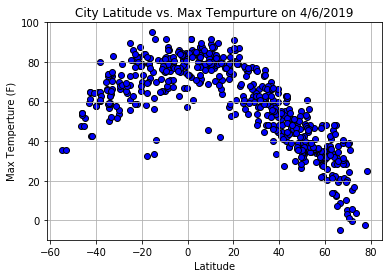

<Figure size 432x288 with 0 Axes>

In [8]:
plt.scatter(cities_pd['Lat'], cities_pd['Max Temp'], 
            marker="o", facecolors = 'blue', edgecolors="black")
plt.title('City Latitude vs. Max Tempurture on 4/6/2019')
plt.xlabel('Latitude')
plt.ylabel('Max Temperture (F)')
plt.grid()
plt.show()
plt.savefig('./Images/City_Latitude_vs_Max_Tempurture.png')

#### Latitude vs. Humidity Plot

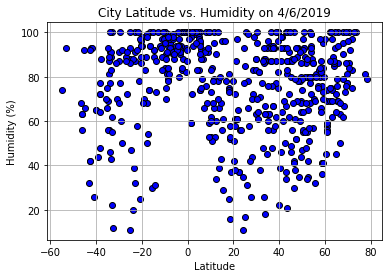

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(cities_pd['Lat'], cities_pd['Humidity'], 
            marker="o", facecolors = 'blue', edgecolors="black")
plt.title('City Latitude vs. Humidity on 4/6/2019')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()
plt.savefig('./Images/City_Latitude_vs_Humidity.png')

#### Latitude vs. Cloudiness Plot

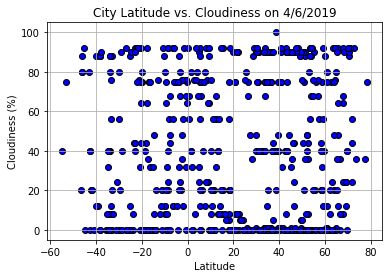

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(cities_pd['Lat'], cities_pd['Cloudiness'], 
            marker="o", facecolors = 'blue', edgecolors="black")
plt.title('City Latitude vs. Cloudiness on 4/6/2019')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()
plt.savefig('./Images/City_Latitude_vs_Cloudiness.png')

#### Latitude vs. Wind Speed Plot

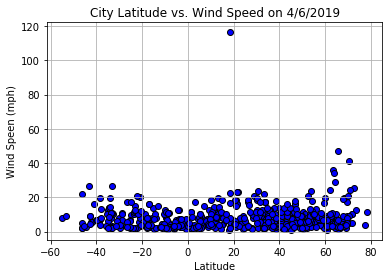

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(cities_pd['Lat'], cities_pd['Wind Speed'], 
            marker="o", facecolors = 'blue', edgecolors="black")
plt.title('City Latitude vs. Wind Speed on 4/6/2019')
plt.xlabel('Latitude')
plt.ylabel('Wind Speen (mph)')
plt.grid()
plt.show()
plt.savefig('./Images/City_Latitude_vs_Wind_Speed.png')

# Observations
 - Wind, Humidity, and Cloudiness have no apparent correlation to Latitude.
 - In general temperture increases as it approaches the equator.

# Google Maps
### For the fun of it I created a heatmap what show temperture inensity decreasing the farther you get from the equator.

In [12]:
# Store latitude and longitude in locations
locations = cities_pd[["Lat", "Lng"]]

max_temp = cities_pd["Max Temp"]

weights_temp = []
for temp in max_temp:
    if temp > 0:
        weights_temp.append(temp)
    else:
        temp = 0
        weights_temp.append(temp)

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=weights_temp, 
                                 dissipating=False, max_intensity=50,
                                 point_radius=.5)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))